In [1]:
import numpy as np
import pandas as pd
from naive_bayes_classifier import NaiveBayesGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
dataset = datasets.load_iris()

In [3]:
dataset.data.shape

(150, 4)

In [4]:
X = dataset.data
y = dataset.target
model = NaiveBayesGD()

<AxesSubplot: ylabel='Count'>

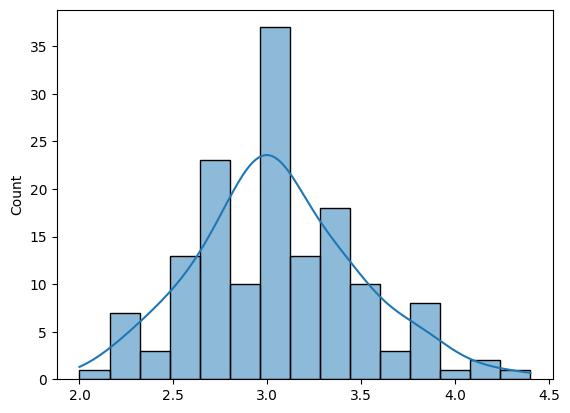

In [5]:
sns.histplot(X[:, 1], kde=True, bins=15)

Text(0, 0.5, 'Sepal width (cm)')

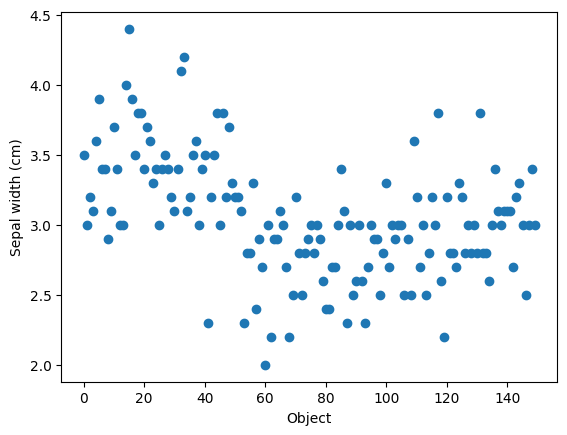

In [6]:
plt.scatter(list(range(150)), X[:, 1])
plt.xlabel('Object')
plt.ylabel('Sepal width (cm)')

Text(0, 0.5, 'Sepal width (cm)')

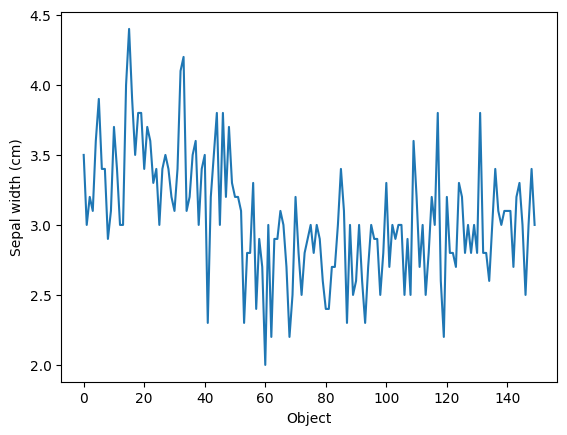

In [7]:
plt.plot(list(range(150)), X[:, 1])
plt.xlabel('Object')
plt.ylabel('Sepal width (cm)')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
train_df = pd.DataFrame(X_train)
train_df.columns = dataset.feature_names
train_df["target"] = y_train
train_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.3,3.3,4.7,1.6,1
1,6.5,3.0,5.8,2.2,2
2,5.6,2.5,3.9,1.1,1
3,5.7,2.8,4.5,1.3,1
4,6.4,2.8,5.6,2.2,2
...,...,...,...,...,...
130,6.1,2.8,4.0,1.3,1
131,4.9,2.5,4.5,1.7,2
132,5.8,4.0,1.2,0.2,0
133,5.8,2.6,4.0,1.2,1


In [10]:
model.fit(X_train, y_train)

In [11]:
means = model.calculate_mean_values()

In [12]:
means_df = pd.DataFrame(means)
means_df.index = dataset.target_names
means_df.columns = dataset.feature_names
print("Mean values of the features for each class:")
means_df

Mean values of the features for each class:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,4.975000,3.427273,1.459091,0.247727
versicolor,5.915909,2.777273,4.250000,1.322727
virginica,6.559574,2.974468,5.542553,2.014894


In [13]:
variances = model.calculate_variances()

In [14]:
var_df = pd.DataFrame(variances)
var_df.index = dataset.target_names
var_df.columns = dataset.feature_names
print("Variances of the features for each class:")
var_df

Variances of the features for each class:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.115966,0.146983,0.031508,0.010677
versicolor,0.274065,0.101302,0.219318,0.041302
virginica,0.392196,0.104029,0.270104,0.075310


In [15]:
frequencies = model.calculate_frequencies()
f_df = pd.Series(frequencies)
f_df.index = dataset.target_names
f_df

setosa        0.325926
versicolor    0.325926
virginica     0.348148
dtype: float64

In [23]:
probs = model.calculate_probabilities(X_test)
probs_df = pd.DataFrame(probs, columns=dataset.target_names)
probs_df

,setosa,versicolor,virginica
0,-217.062403,-1.829461,-7.193590
1,-4.908912,-33.855721,-52.130092
2,-702.483584,-34.655049,-7.337863
3,-226.778034,-1.731255,-5.253166
4,-256.122131,-3.311527,-4.806061
5,-3.014831,-31.069036,-51.205684
6,-128.340907,-2.346964,-12.634080
7,-425.068195,-16.611137,-2.180836
8,-232.896219,-3.436063,-7.875008
9,-142.869744,-1.636683,-11.555863


In [17]:
predict = model.predict(X_test)
predict

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0.])

In [18]:
accuracy_score(y_test, predict)

1.0

In [19]:
sk_model = GaussianNB()
sk_model.fit(X_train, y_train)
predict = sk_model.predict(X_test)

In [20]:
predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0])

In [21]:
accuracy_score(y_test, predict)

1.0